Initializing
12.566370614359172
0
2.1525727441263394
100
0.007632512044692286
200
0.003215945863211056
300
0.001940577304787361
400
0.0013540629940349547


/tmp/ipykernel_229/2918046058.py:48: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)                                      # Plot axes


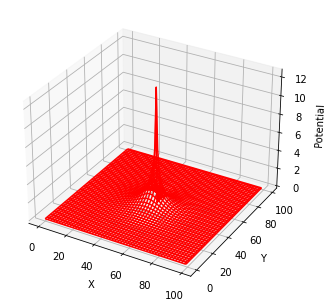

[0.00000000e+00 6.44938916e-04 1.32522294e-03 2.07097419e-03
 2.91432129e-03 3.89025510e-03 5.03750729e-03 6.39945742e-03
 8.02507270e-03 9.96988392e-03 1.22969995e-02 1.50781588e-02
 1.83948243e-02 2.23393123e-02 2.70159604e-02 3.25423313e-02
 3.90504507e-02 4.66880837e-02 5.56200500e-02 6.60295906e-02
 7.81197971e-02 9.21151306e-02 1.08263064e-01 1.26835902e-01
 1.48132848e-01 1.72482423e-01 2.00245378e-01 2.31818279e-01
 2.67638041e-01 3.08187738e-01 3.54004202e-01 4.05688047e-01
 4.63917078e-01 5.29464411e-01 6.03223213e-01 6.86240948e-01
 7.79767396e-01 8.85323193e-01 1.00479958e+00 1.14060717e+00
 1.29590446e+00 1.47496136e+00 1.68376386e+00 1.93107652e+00
 2.23044601e+00 2.60434311e+00 3.09380503e+00 3.78439325e+00
 4.88813855e+00 7.04422901e+00]


/tmp/ipykernel_229/2918046058.py:67: RuntimeWarning: divide by zero encountered in log
  y_test = -2*1*1*np.log(-x_test+50)+8 #8 is the additive constant


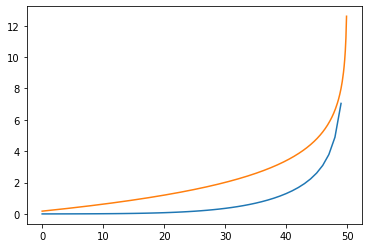

In [54]:
#taken from lecture 11, gauss seidel method

import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy as np;
print("Initializing")
Nmax = 100; Niter = 500; V = zeros((Nmax, Nmax), float)   

V[50,50] = 1.0*1.0*4*np.pi            # Point at 50,50
#Need to make specific iteration ranges so we don't mess up our initial value
i_iter = np.array(range(1,Nmax-1))

j_iter = i_iter



print(V[50,50])
for iter in range(Niter):                                  
    if iter%100 == 0: print(iter)
    maxerr=0.
#    for i in range(1, Nmax-1):                                                
 #       for j in range(1,Nmax-1): 
    for i in i_iter:
        for j in j_iter: 
            if i == j == 50:
                break #don't change the value of the wire potential
            #because of the 3-d components, we need to add the contributions of the adjacent z-cells, which by symmetry will always be the same as the current cell
            du = 1./6.*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1]+2*V[i,j])-V[i,j]
            if(maxerr<abs(du)): # how much correction we have in this step
                maxerr=abs(du)  #
            V[i,j]= V[i,j]+du

    if iter%100 ==0:print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = p.meshgrid(x,y)                 

def functz(V):                                         # V(x, y) 
    z = V[X,Y]                        
    return z

Z = functz(V)                          
fig = p.figure()                                      # Create figure
ax = Axes3D(fig)                                      # Plot axes
ax.plot_wireframe(X, Y, Z, color = 'r')               # Red wireframe
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
p.show()                                              # Show fig


#Part 2

#Extract a radial slice. Since the potential should be radially symmetric, any slice will do:
x_plot = np.arange(50)
y_plot = V[50,:50]
print(y_plot)
p.plot(x_plot,y_plot)

#Test against the given function. let rho=mu=1

x_test = np.linspace(0.0001,50,500)
y_test = -2*1*1*np.log(-x_test+50)+8 #8 is the additive constant 

p.plot(x_test,y_test)